## Overview

## Imports 

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [11]:
from fastai import *
from fastai.vision import *

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import metrics

In [ ]:
# old fastai library
from fastai.imports import *
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics

In [6]:
plt.style.use(['dark_background'])

In [9]:
#set_plot_sizes(12,14,16)

## Paths

In [10]:
DATA_PATH = Path.home()/".fastai/data"
PATH = DATA_PATH/"competitions/petfinder-adoption-prediction"

In [12]:
PATH.ls()

[PosixPath('/home/achen/.fastai/data/competitions/petfinder-adoption-prediction/breed_labels.csv'),
 PosixPath('/home/achen/.fastai/data/competitions/petfinder-adoption-prediction/color_labels.csv'),
 PosixPath('/home/achen/.fastai/data/competitions/petfinder-adoption-prediction/state_labels.csv'),
 PosixPath('/home/achen/.fastai/data/competitions/petfinder-adoption-prediction/test.zip'),
 PosixPath('/home/achen/.fastai/data/competitions/petfinder-adoption-prediction/test_images.zip'),
 PosixPath('/home/achen/.fastai/data/competitions/petfinder-adoption-prediction/test_metadata.zip'),
 PosixPath('/home/achen/.fastai/data/competitions/petfinder-adoption-prediction/test_sentiment.zip'),
 PosixPath('/home/achen/.fastai/data/competitions/petfinder-adoption-prediction/train.zip'),
 PosixPath('/home/achen/.fastai/data/competitions/petfinder-adoption-prediction/train_images.zip'),
 PosixPath('/home/achen/.fastai/data/competitions/petfinder-adoption-prediction/train_metadata.zip'),
 PosixPath(

## Data

In [ ]:
import feather
#df_raw = pd.read_feather(PATH/'tmp/bulldozers-raw')
df_raw = feather.read_dataframe(PATH/'tmp/bulldozers-raw')
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice')

In [ ]:
def split_vals(a,n): return a[:n], a[n:]
n_valid = 12000
n_trn = len(df_trn)-n_valid
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)
raw_train, raw_valid = split_vals(df_raw, n_trn)

In [ ]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [ ]:
df_raw

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,2,521D,...,16,3,320,False,False,False,False,False,False,1163635200
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,2,950FII,...,26,4,86,False,False,False,False,False,False,1080259200
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,0,226,...,26,3,57,False,False,False,False,False,False,1077753600
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,0,PC120-6E,...,19,3,139,False,False,False,False,False,False,1305763200
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,1,S175,...,23,3,204,False,False,False,False,False,False,1248307200
5,1139255,10.184900,1001274,4605,121,3.0,2004,508.0,2,310G,...,18,3,353,False,False,False,False,False,False,1229558400
6,1139256,9.952278,772701,1937,121,3.0,1993,11540.0,0,790ELC,...,26,3,239,False,False,False,False,False,False,1093478400
7,1139261,10.203592,902002,3539,121,3.0,2001,4883.0,0,416D,...,17,3,321,False,False,False,False,False,False,1132185600
8,1139272,9.975808,1036251,36003,121,3.0,2008,302.0,2,430HAG,...,27,3,239,False,False,False,False,False,False,1251331200
9,1139275,11.082143,1016474,3883,121,3.0,1000,20700.0,1,988B,...,9,3,221,False,False,False,False,False,False,1186617600


# Confidence based on tree variance

For model interpretation, there's no need to use the full dataset on each tree - using a subset will be both faster, and also provide better interpretability (since an overfit model will not provide much variance across trees).

In [ ]:
set_rf_samples(50000)

In [ ]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.2060365573429694, 0.24765517755725094, 0.9112796195657782, 0.8904675510545982, 0.8942098791597685]


We saw how the model averages predictions across the trees to get an estimate - but how can we know the confidence of the estimate? One simple way is to use the standard deviation of predictions, instead of just the mean. This tells us the *relative* confidence of predictions - that is, for rows where the trees give very different results, you would want to be more cautious of using those results, compared to cases where they are more consistent. Using the same example as in the last lesson when we looked at bagging:

In [ ]:
%time preds = np.stack([t.predict(X_valid) for t in m.estimators_])
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 781 ms, sys: 156 ms, total: 938 ms
Wall time: 939 ms


(9.248122943717707, 0.22651921642367676)

When we use python to loop through trees like this, we're calculating each in series, which is slow! We can use parallel processing to speed things up:

In [ ]:
def get_preds(t): return t.predict(X_valid)
%time preds = np.stack(parallel_trees(m, get_preds))
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 125 ms, sys: 609 ms, total: 734 ms
Wall time: 1.01 s


(9.248122943717707, 0.22651921642367676)

We can see that different trees are giving different estimates this this auction. In order to see how prediction confidence varies, we can add this into our dataset.

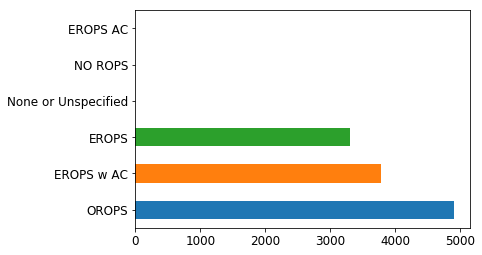

In [ ]:
x = raw_valid.copy()
x['pred_std'] = np.std(preds, axis=0)
x['pred'] = np.mean(preds, axis=0)
x.Enclosure.value_counts().plot.barh();

In [ ]:
flds = ['Enclosure', 'SalePrice', 'pred', 'pred_std']
enc_summ = x[flds].groupby('Enclosure', as_index=False).mean()
enc_summ

,Enclosure,SalePrice,pred,pred_std
0,EROPS,9.849178,9.838707,0.275266
1,EROPS AC,NaN,NaN,NaN
2,EROPS w AC,10.623971,10.571748,0.268111
3,NO ROPS,NaN,NaN,NaN
4,None or Unspecified,NaN,NaN,NaN
5,OROPS,9.682064,9.683144,0.220233


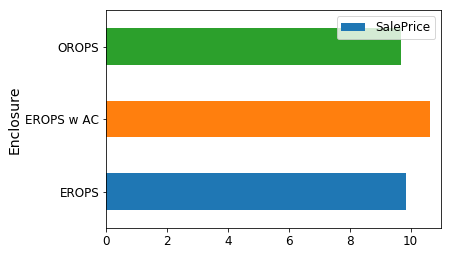

In [ ]:
enc_summ = enc_summ[~pd.isnull(enc_summ.SalePrice)]
enc_summ.plot('Enclosure', 'SalePrice', 'barh', xlim=(0,11));

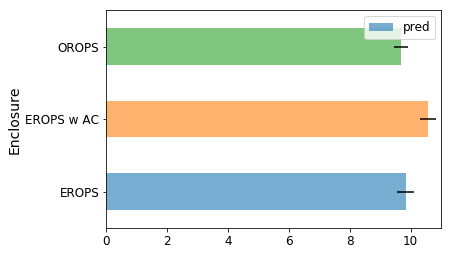

In [ ]:
enc_summ.plot('Enclosure', 'pred', 'barh', xerr='pred_std', alpha=0.6, xlim=(0,11));

*Question*: Why are the predictions nearly exactly right, but the error bars are quite wide?

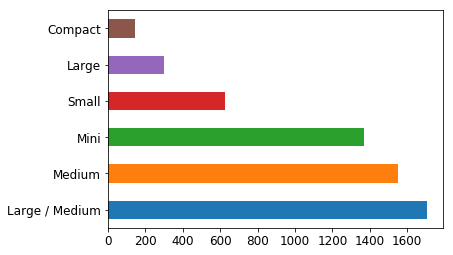

In [ ]:
raw_valid.ProductSize.value_counts().plot.barh();

In [ ]:
flds = ['ProductSize', 'SalePrice', 'pred', 'pred_std']
summ = x[flds].groupby(flds[0]).mean()
summ

,SalePrice,pred,pred_std
ProductSize,,,
Compact,9.735093,9.864117,0.351004
Large,10.470589,10.381792,0.362014
Large / Medium,10.691871,10.642614,0.300071
Medium,10.681511,10.620614,0.287144
Mini,9.535147,9.555653,0.247162
Small,10.324448,10.327570,0.312606


In [ ]:
(summ.pred_std/summ.pred).sort_values(ascending=False)

ProductSize
Compact           0.035584
Large             0.034870
Small             0.030269
Large / Medium    0.028195
Medium            0.027036
Mini              0.025866
dtype: float64

# Feature importance

It's not normally enough to just to know that a model can make accurate predictions - we also want to know *how* it's making predictions. The most important way to see this is with *feature importance*.

In [ ]:
fi = rf_feat_importance(m, df_trn); fi[:10]

,cols,imp
5,YearMade,0.168747
13,ProductSize,0.098665
37,Coupler_System,0.092421
14,fiProductClassDesc,0.080412
39,Hydraulics_Flow,0.071703
2,ModelID,0.059627
63,saleElapsed,0.050590
19,Enclosure,0.044843
10,fiSecondaryDesc,0.042568
8,fiModelDesc,0.034038


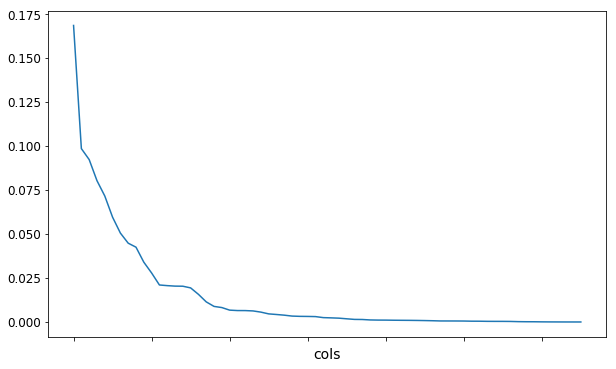

In [ ]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False);

In [ ]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

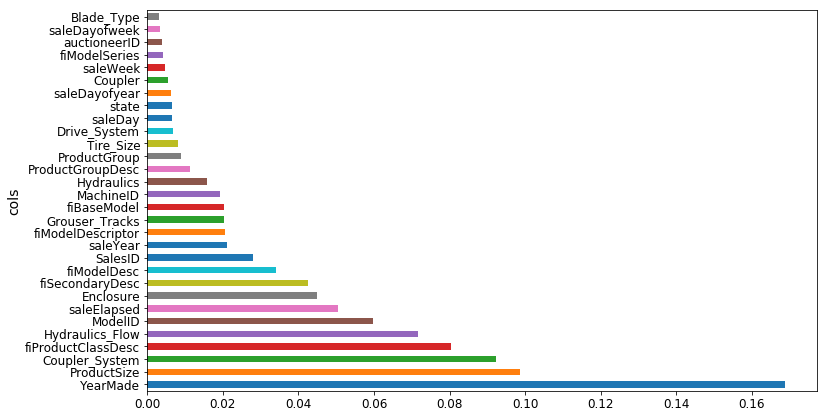

In [ ]:
plot_fi(fi[:30]);

In [ ]:
to_keep = fi[fi.imp>0.005].cols; len(to_keep)

25

In [ ]:
df_keep = df_trn[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

In [ ]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5,
                          n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.20717632053098164, 0.24513708178842883, 0.9102953290508052, 0.8926836242190878, 0.8940272659573176]


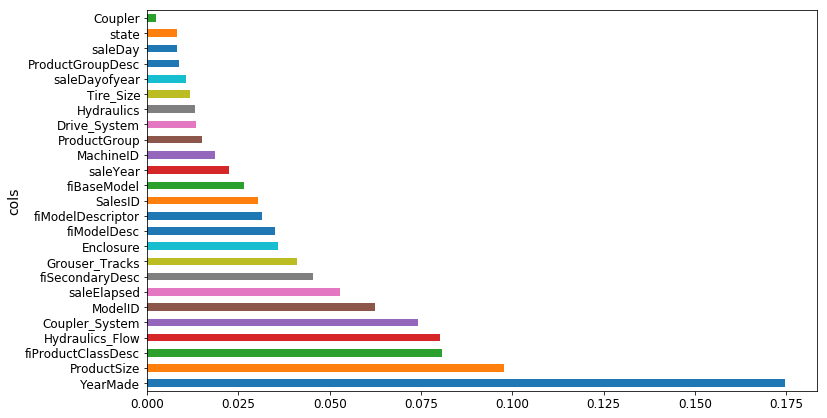

In [ ]:
fi = rf_feat_importance(m, df_keep)
plot_fi(fi);

## One-hot encoding

proc_df's optional *max_n_cat* argument will turn some categorical variables into new columns.

For example, the column **ProductSize** which has 6 categories:

* Large
* Large / Medium
* Medium
* Compact
* Small
* Mini

gets turned into 6 new columns:

* ProductSize_Large
* ProductSize_Large / Medium
* ProductSize_Medium
* ProductSize_Compact
* ProductSize_Small
* ProductSize_Mini

and the column **ProductSize** gets removed.

It will only happen to columns whose number of categories is no bigger than the value of the *max_n_cat* argument.

Now some of these new columns may prove to have more important features than in the earlier situation, where all categories were in one column.

In [ ]:
df_trn2, y_trn, nas = proc_df(df_raw, 'SalePrice', max_n_cat=7)
X_train, X_valid = split_vals(df_trn2, n_trn)

m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.2075955000181503, 0.2529422358424833, 0.9099319632157405, 0.8857409312165964, 0.8921939883696186]


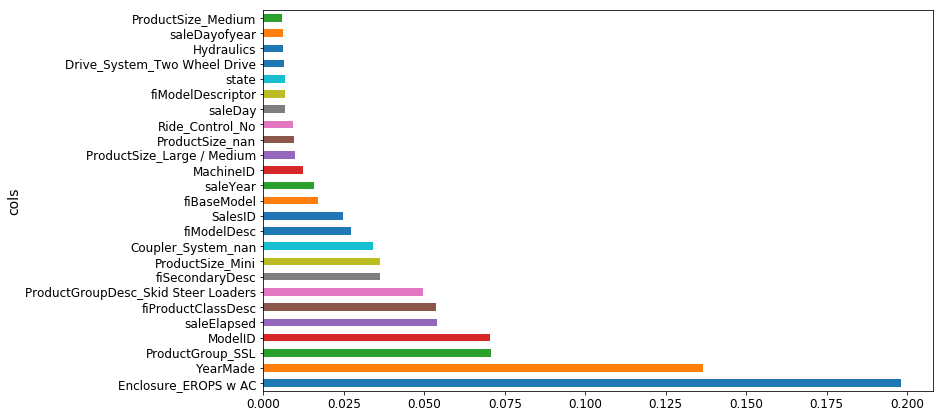

In [ ]:
fi = rf_feat_importance(m, df_trn2)
plot_fi(fi[:25]);

# Removing redundant features

One thing that makes this harder to interpret is that there seem to be some variables with very similar meanings. Let's try to remove redundent features.

In [ ]:
from scipy.cluster import hierarchy as hc

In [ ]:
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr.shape

(25, 25)

In [ ]:
corr_condensed = hc.distance.squareform(1-corr)
corr_condensed.shape

(300,)

In [ ]:
z = hc.linkage(corr_condensed, method='average')
z.shape

(24, 4)

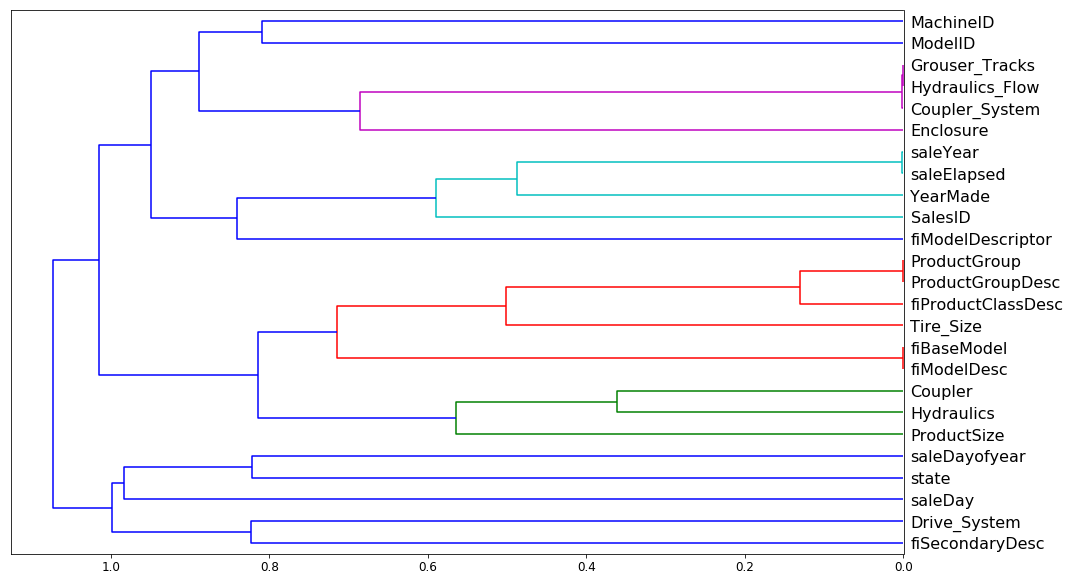

In [ ]:
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, orientation='left', leaf_font_size=16)
plt.show()

Let's try removing some of these related features to see if the model can be simplified without impacting the accuracy.

In [ ]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=30, min_samples_leaf=5, max_features=0.6, n_jobs=-1, oob_score=True)
    x, _ = split_vals(df, n_trn)
    m.fit(x, y_train)
    return m.oob_score_

Here's our baseline.

In [ ]:
get_oob(df_keep)

0.8906720982361825

Now we try removing each variable one at a time.

In [ ]:
for c in ('saleYear', 'saleElapsed', 'fiModelDesc', 'fiBaseModel', 'Grouser_Tracks', 'Coupler_System', 'Hydraulics_Flow', 'ProductGroupDesc', 'ProductGroup'):
    print(c, get_oob(df_keep.drop(c, axis=1)))

saleYear 0.8890424987593928
saleElapsed 0.8869382516398119
fiModelDesc 0.8886699871629259
fiBaseModel 0.888926583722448
Grouser_Tracks 0.8898724618366286
Coupler_System 0.8898045603898062
Hydraulics_Flow 0.889441466817207
ProductGroupDesc 0.8906595128963493
ProductGroup 0.8902362138065564


It looks like we can try one from each group for removal. Let's see what that does.

In [ ]:
to_drop = ['saleYear', 'fiBaseModel', 'Coupler_System', 'Hydraulics_Flow', 'ProductGroupDesc']
get_oob(df_keep.drop(to_drop, axis=1))

0.8890748404534458

Looking good! Let's use this dataframe from here. We'll save the list of columns so we can reuse it later.

In [ ]:
df_keep.drop(to_drop, axis=1, inplace=True)
X_train, X_valid = split_vals(df_keep, n_trn)

In [ ]:
np.save(PATH/'tmp/keep_cols.npy', np.array(df_keep.columns))

In [ ]:
keep_cols = np.load(PATH/'tmp/keep_cols.npy')
df_keep = df_trn[keep_cols]

And let's see how this model looks on the full dataset.

In [ ]:
reset_rf_samples()

In [ ]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.12482023631570183, 0.22652724354740772, 0.9674384682213222, 0.9083592035953153, 0.9088949888203722]


# Partial dependence

In [ ]:
from pdpbox import pdp
from plotnine import *

In [ ]:
set_rf_samples(50000)

This next analysis will be a little easier if we use the 1-hot encoded categorical variables, so let's load them up again.

In [ ]:
df_trn2, y_trn, nas = proc_df(df_raw, 'SalePrice', max_n_cat=7)
X_train, X_valid = split_vals(df_trn2, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1)
m.fit(X_train, y_train);

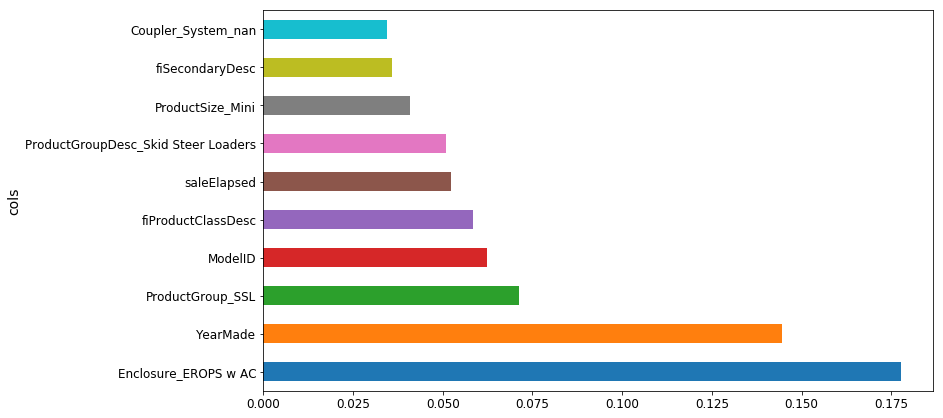

In [ ]:
plot_fi(rf_feat_importance(m, df_trn2)[:10]);

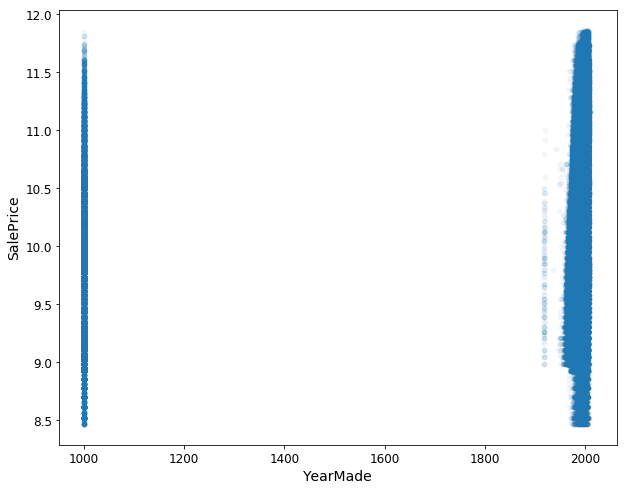

In [ ]:
df_raw.plot('YearMade', 'SalePrice', 'scatter', alpha=.05, figsize=(10,8));

In [ ]:
x_all = get_sample(df_raw[df_raw.YearMade>1930], 500)

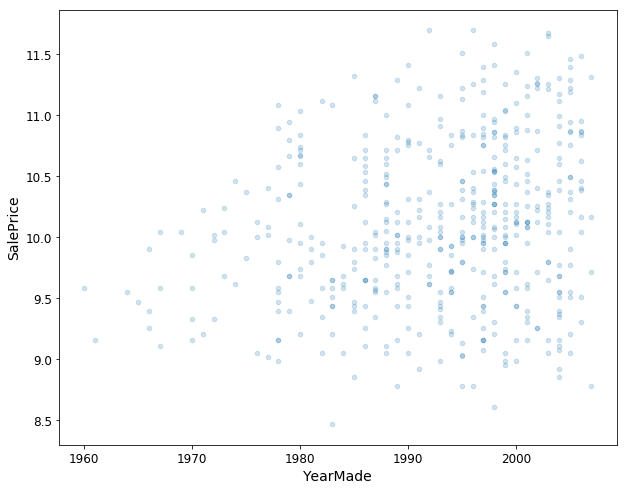

In [ ]:
x_all.plot('YearMade', 'SalePrice', 'scatter', alpha=.2, figsize=(10,8))

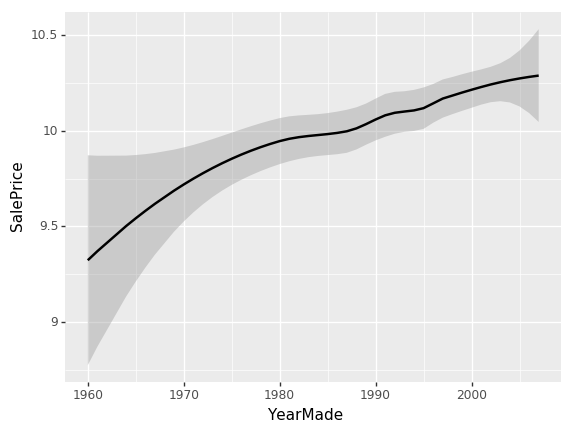

<ggplot: (8771498628174)>

In [ ]:
ggplot(x_all, aes('YearMade', 'SalePrice'))+stat_smooth(se=True, method='loess')

In [ ]:
x = get_sample(X_train[X_train.YearMade>1930], 500)

In [ ]:
def plot_pdp(feat, clusters=None, feat_name=None):
    feat_name = feat_name or feat
    p = pdp.pdp_isolate(m, x, x.columns, feat)
    return pdp.pdp_plot(p, feat_name, plot_lines=True,
                        cluster=clusters is not None,
                        n_cluster_centers=clusters)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fa460f54cf8>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fa460c542b0>})

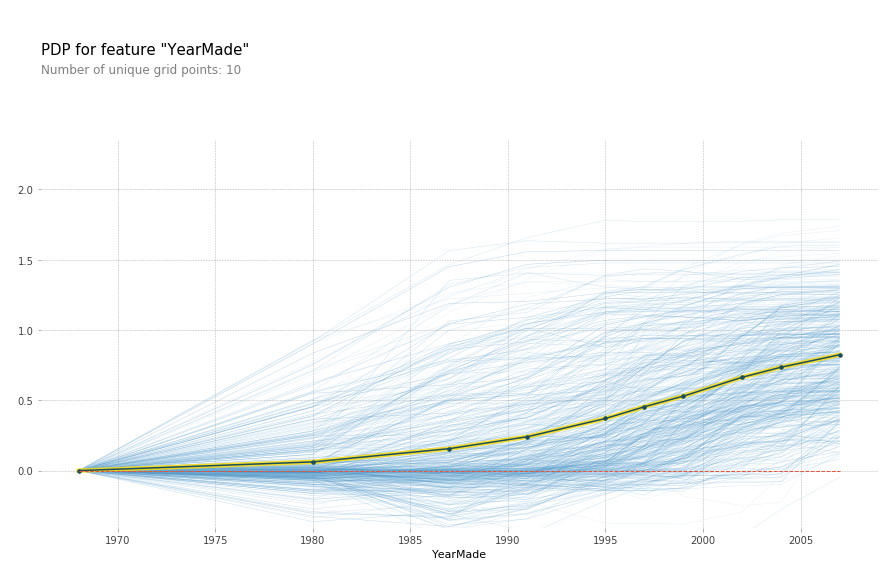

In [ ]:
plot_pdp('YearMade')

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fa46085e470>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fa439ac8860>})

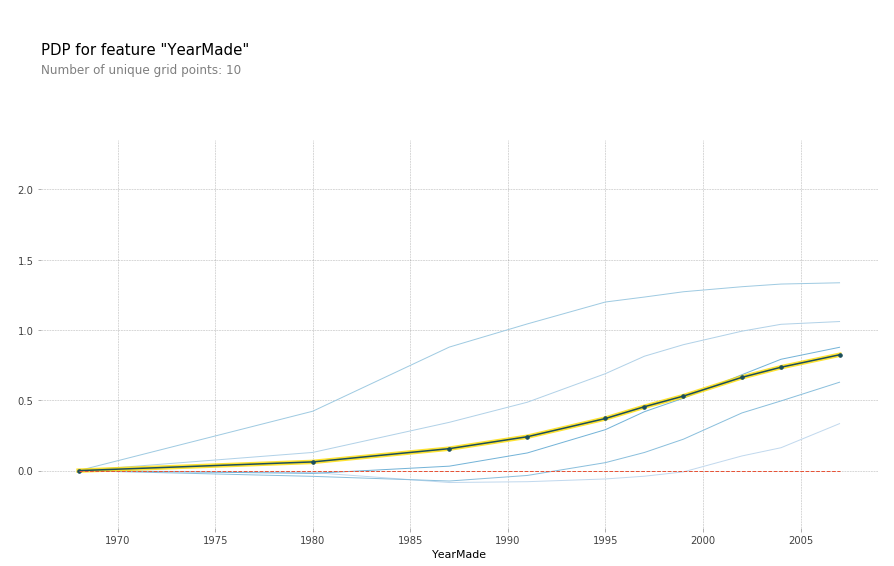

In [ ]:
plot_pdp('YearMade', clusters=5)

In [ ]:
#feats = ['saleElapsed', 'YearMade']
#p = pdp.pdp_interact(m, x, x.columns, feats)
#pdp.pdp_interact_plot(p, feats)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fa439b37588>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fa439aa0630>})

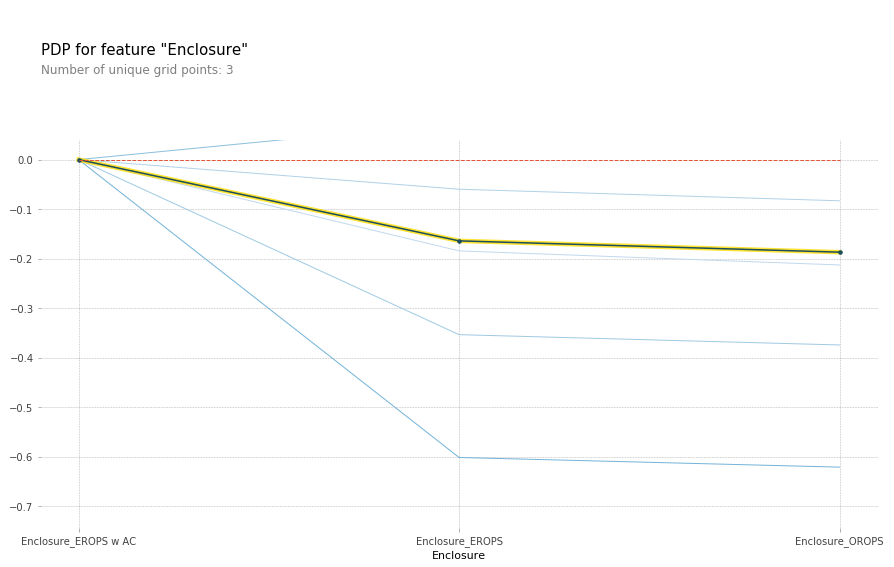

In [ ]:
plot_pdp(['Enclosure_EROPS w AC', 'Enclosure_EROPS', 'Enclosure_OROPS'], 5, 'Enclosure')

In [ ]:
df_raw.YearMade[df_raw.YearMade<1950] = 1950
df_keep['age'] = df_raw['age'] = df_raw.saleYear-df_raw.YearMade

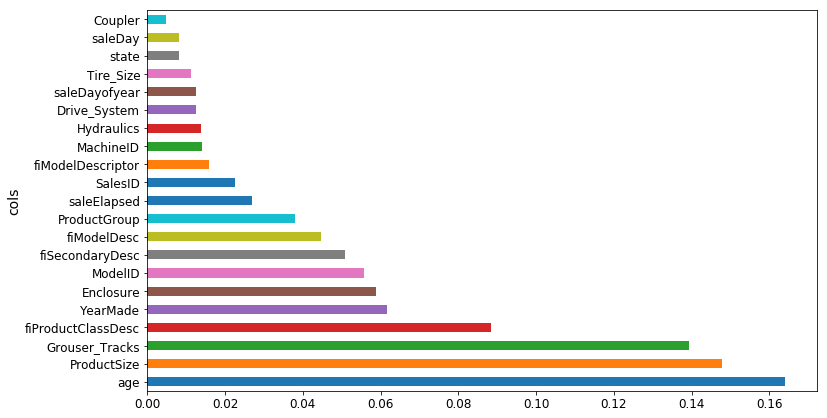

In [ ]:
X_train, X_valid = split_vals(df_keep, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1)
m.fit(X_train, y_train)
plot_fi(rf_feat_importance(m, df_keep));

# Tree interpreter

In [ ]:
from treeinterpreter import treeinterpreter as ti

In [ ]:
df_train, df_valid = split_vals(df_raw[df_keep.columns], n_trn)

In [ ]:
row = X_valid.values[None,0]; row

array([[      1999,          5,         17,        665, 1284595200,          1,          0,       3232,
           4364751,          0,          0,    2300944,         12,          4,          0,          0,
                16,         35,        259,          3,         11]])

In [ ]:
prediction, bias, contributions = ti.predict(m, row)

In [ ]:
prediction[0], bias[0]

(9.320280087297919, 10.105574524057683)

In [ ]:
idxs = np.argsort(contributions[0])

In [ ]:
[o for o in zip(df_keep.columns[idxs], df_valid.iloc[0][idxs], contributions[0][idxs])]

[('ProductSize', 'Mini', -0.45734837810569495),
 ('fiProductClassDesc',
  'Hydraulic Excavator, Track - 3.0 to 4.0 Metric Tons',
  -0.13974094934860432),
 ('fiModelDesc', 'KX1212', -0.07790234691241352),
 ('age', 11, -0.06950116278007154),
 ('fiSecondaryDesc', nan, -0.048020761942759595),
 ('fiModelDescriptor', nan, -0.047446369043236736),
 ('SalesID', 4364751, -0.025053630897324153),
 ('Enclosure', 'EROPS', -0.024735827061631088),
 ('saleDayofyear', 259, -0.023620923694473016),
 ('saleElapsed', 1284595200, -0.011448702051674475),
 ('MachineID', 2300944, -0.009079904092389013),
 ('Tire_Size', nan, -0.005583639413932718),
 ('saleDay', 16, -0.005089722960176957),
 ('Coupler', 'None or Unspecified', -0.002958942655771679),
 ('state', 'Ohio', -0.002649852418520382),
 ('Drive_System', nan, 0.0035033648857865974),
 ('Hydraulics', 'Standard', 0.004122671899470865),
 ('ModelID', 665, 0.03297888177585895),
 ('ProductGroup', 'TEX', 0.03697926083899703),
 ('YearMade', 1999, 0.03984918164105524),


In [ ]:
contributions[0].sum()

-0.7852944367597641

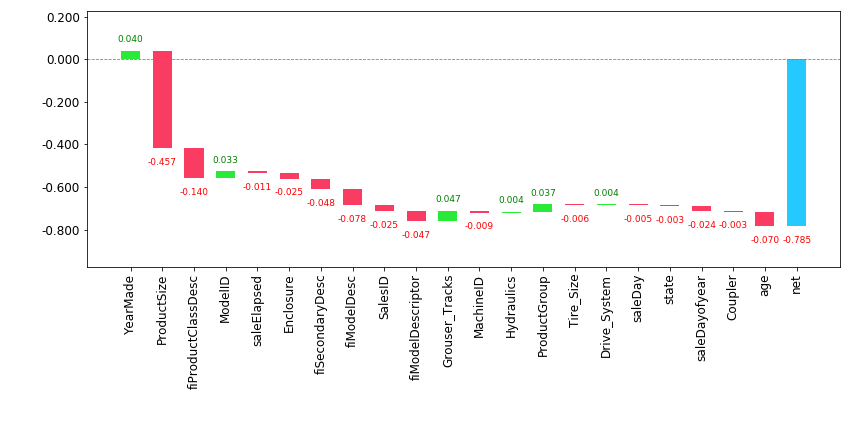

In [ ]:
import waterfall_chart
waterfall_chart.plot(df_keep.columns, contributions[0][:], rotation_value=90, threshold=0, formatting='{:,.3f}')
plt.gcf().set_size_inches(14,10)

# Extrapolation

In [ ]:
df_ext = df_keep.copy()
df_ext['is_valid'] = 1
df_ext.is_valid[:n_trn] = 0
x, y, nas = proc_df(df_ext, 'is_valid')

In [ ]:
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(x, y);
m.oob_score_

0.9999950140230601

In [ ]:
fi = rf_feat_importance(m, x); fi[:10]

,cols,imp
8,SalesID,0.802499
4,saleElapsed,0.148341
11,MachineID,0.038175
18,saleDayofyear,0.004921
7,fiModelDesc,0.002657
3,ModelID,0.001245
0,YearMade,0.000990
16,saleDay,0.000243
6,fiSecondaryDesc,0.000224
13,ProductGroup,0.000172


In [ ]:
feats=['SalesID', 'saleElapsed', 'MachineID']

In [ ]:
(X_train[feats]/1000).describe()

,SalesID,saleElapsed,MachineID
count,389125.000000,3.891250e+05,389125.000000
mean,1800.452485,1.084797e+06,1206.796148
std,595.627288,1.803913e+05,430.850552
min,1139.246000,6.009984e+05,0.000000
25%,1413.348000,9.666432e+05,1087.016000
50%,1632.093000,1.134605e+06,1273.859000
75%,2210.453000,1.234138e+06,1458.661000
max,4364.741000,1.325117e+06,2313.821000


In [ ]:
(X_valid[feats]/1000).describe()

,SalesID,saleElapsed,MachineID
count,12000.000000,1.200000e+04,12000.000000
mean,5786.967651,1.306609e+06,1578.049709
std,836.899608,2.497808e+04,589.497173
min,4364.751000,1.174522e+06,0.830000
25%,4408.580750,1.309219e+06,1271.225250
50%,6272.538500,1.316045e+06,1825.317000
75%,6291.792250,1.321402e+06,1907.858000
max,6333.342000,1.325203e+06,2486.330000


In [ ]:
x.drop(feats, axis=1, inplace=True)

In [ ]:
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(x, y);
m.oob_score_

0.9787896540978498

In [ ]:
fi = rf_feat_importance(m, x); fi[:10]

,cols,imp
17,age,0.234568
0,YearMade,0.193072
15,saleDayofyear,0.150341
3,ModelID,0.081780
6,fiModelDesc,0.063845
13,saleDay,0.056174
14,state,0.052190
2,fiProductClassDesc,0.032725
5,fiSecondaryDesc,0.022870
4,Enclosure,0.022130


In [ ]:
set_rf_samples(50000)

In [ ]:
feats=['SalesID', 'saleElapsed', 'MachineID', 'age', 'YearMade', 'saleDayofyear']

In [ ]:
X_train, X_valid = split_vals(df_keep, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.2078820621688121, 0.24960604004571327, 0.9096831340813669, 0.8887351069911545, 0.8932146404448459]


In [ ]:
for f in feats:
    df_subs = df_keep.drop(f, axis=1)
    X_train, X_valid = split_vals(df_subs, n_trn)
    m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(X_train, y_train)
    print(f)
    print_score(m)

SalesID
[0.20922523017196265, 0.24682613210629858, 0.9085122525755086, 0.8911996608126452, 0.8921044219018003]
saleElapsed
[0.21422688685466199, 0.2543946435962391, 0.9040858285682636, 0.884425000676838, 0.8869101644655132]
MachineID
[0.20688365738803333, 0.2477457464269526, 0.9105485887653003, 0.8903874231595463, 0.8947011535872818]
age
[0.20856972468829915, 0.24749708757096878, 0.9090846192593529, 0.8906073458831766, 0.8924567519558203]
YearMade
[0.20863434939472933, 0.2512804816323599, 0.909028270812486, 0.8872372949380579, 0.8924121564218132]
saleDayofyear
[0.20861225156618493, 0.24501549353857424, 0.9090475406136379, 0.8927900558874764, 0.8928534026810214]


In [ ]:
reset_rf_samples()

In [ ]:
df_subs = df_keep.drop(['SalesID', 'MachineID', 'saleDayofyear'], axis=1)
X_train, X_valid = split_vals(df_subs, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.13747574807909185, 0.21931169192196567, 0.9605009173651673, 0.9141042759859256, 0.9089330365208386]


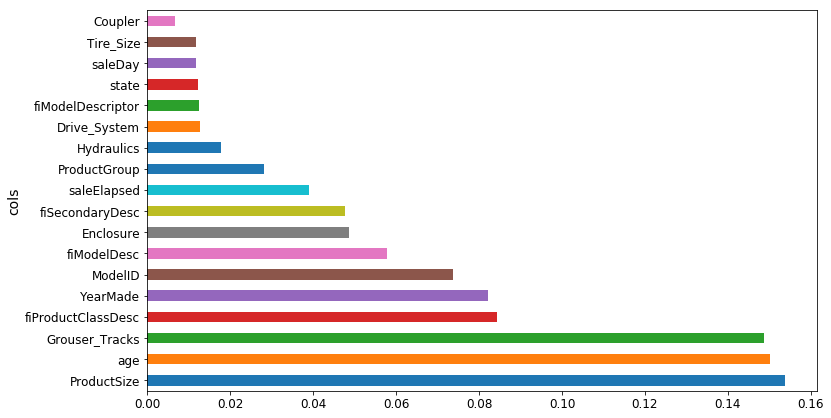

In [ ]:
plot_fi(rf_feat_importance(m, X_train));

In [ ]:
np.save(PATH/'tmp/subs_cols.npy', np.array(df_subs.columns))

# Our final model!

In [ ]:
m = RandomForestRegressor(n_estimators=160, max_features=0.5, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 5min 43s, sys: 10 s, total: 5min 53s
Wall time: 52.7 s
[0.0800510282896084, 0.21185493517729848, 0.9866072841051851, 0.9198460102412358, 0.9145684350669638]
